# Setiment Analysis on Amazon Reviews using NB, Logistic, and XgBoost Classifier

# TASK #1: IMPORT DATA AND PERFORM EXPLORATORY DATA ANALYSIS

In [5]:
#!pip install jupyterthemes

In [6]:
#!pip install gdown

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# For downloading dataset from the google drive
import gdown

from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
# setting the style of the notebook to be monokai theme
# this line of code is important to ensure that we are able to see the x and y axes clearly

In [12]:
# File ID from the Google Drive link
file_id = '1GFD8kDOK8S22HIpmZwmy0RC0M-ERSTfU'

# Construct the URL for downloading
download_url = f"https://drive.google.com/uc?id={file_id}"
download_url

# Download the file
gdown.download(download_url, 'amazon_reviews.csv', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1GFD8kDOK8S22HIpmZwmy0RC0M-ERSTfU
To: /content/amazon_reviews.csv
100%|██████████| 515k/515k [00:00<00:00, 6.84MB/s]


'amazon_reviews.csv'

In [13]:
# Load the data
reviews_df = pd.read_csv('amazon_reviews.csv')
reviews_df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [19]:
# View the DataFrame Information
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


###### We can see there is one null value in the verified reviews.

In [15]:
# View DataFrame Statistical Summary
reviews_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


# TASK #2: PERFORM DATA EXPLORATION

<Axes: xlabel='rating', ylabel='count'>

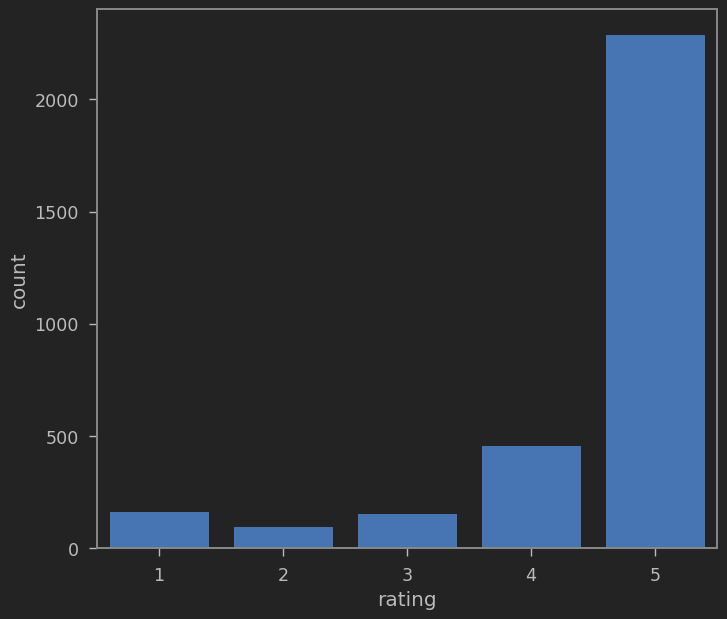

In [16]:
# Plot the count plot for the ratings
sns.countplot(x = reviews_df['rating'])

`Insight:` Mostly good reviews for the product.

In [21]:
# Deleting one row with null 'verified_reviews' in the dataframe
reviews_df = reviews_df.dropna(subset=['verified_reviews'])
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3149 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3149 non-null   int64 
 1   date              3149 non-null   object
 2   variation         3149 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3149 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 147.6+ KB


In [22]:
# Let's get the length of the verified_reviews column #
reviews_df['length'] = reviews_df['verified_reviews'].apply(len)
reviews_df

<ipython-input-22-0a450f6c286d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_df['length'] = reviews_df['verified_reviews'].apply(len)


,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


<Axes: ylabel='Frequency'>

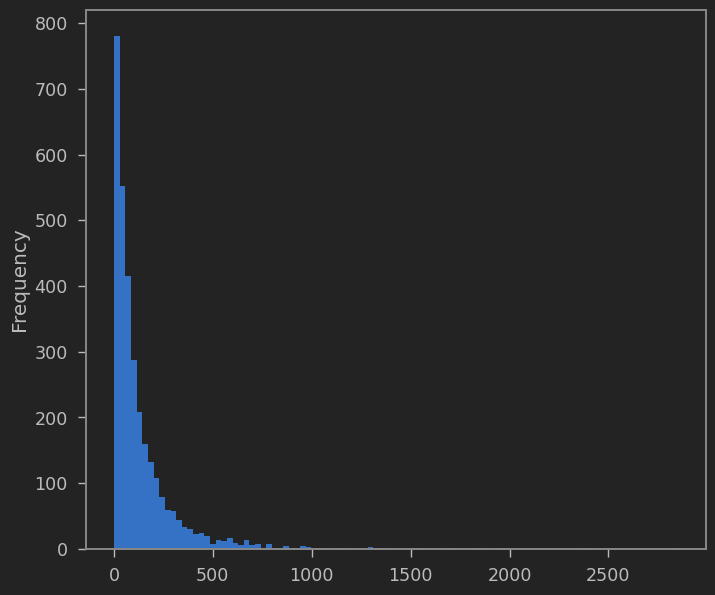

In [23]:
# Plot the histogram for the length
reviews_df['length'].plot(bins=100, kind='hist')

In [24]:
# Apply the describe method to get statistical summary
reviews_df.describe()

,rating,feedback,length
count,3149.000000,3149.000000,3149.000000
mean,4.463957,0.918704,132.090187
std,1.067773,0.273332,182.114569
min,1.000000,0.000000,1.000000
25%,4.000000,1.000000,30.000000
50%,5.000000,1.000000,74.000000
75%,5.000000,1.000000,165.000000
max,5.000000,1.000000,2851.000000


<Axes: xlabel='feedback', ylabel='count'>

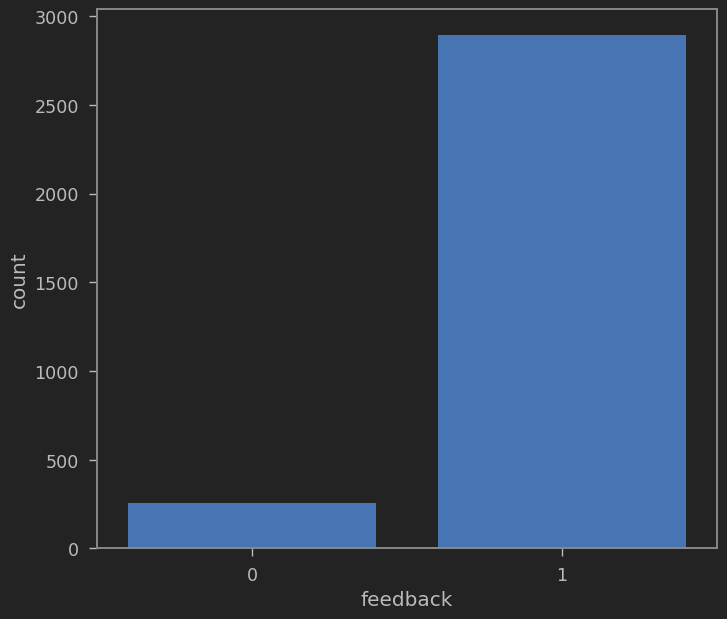

In [25]:
# Plot the countplot for feedback
sns.countplot(x = reviews_df['feedback'])

`Insight:` Positive ~2800 and Negative ~250. A case for unbalanced classes.

# TASK #3: PLOT WORDCLOUD

In [26]:
# Obtain only the positive reviews
positive = reviews_df[reviews_df['feedback'] == 1]
positive

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


In [27]:
# Obtain the negative reviews only
negative = reviews_df[reviews_df['feedback'] == 0]
negative

,rating,date,variation,verified_reviews,feedback,length
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20
...,...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0,120
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0,37
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0,240
3091,1,30-Jul-18,Black Dot,I didn’t order it,0,17


In [28]:
# Convert to list format
sentences = positive['verified_reviews'].tolist()
len(sentences)

2893

In [29]:
# Join all reviews into one large string
sentences_as_one_string =" ".join(sentences)
sentences_as_one_string

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

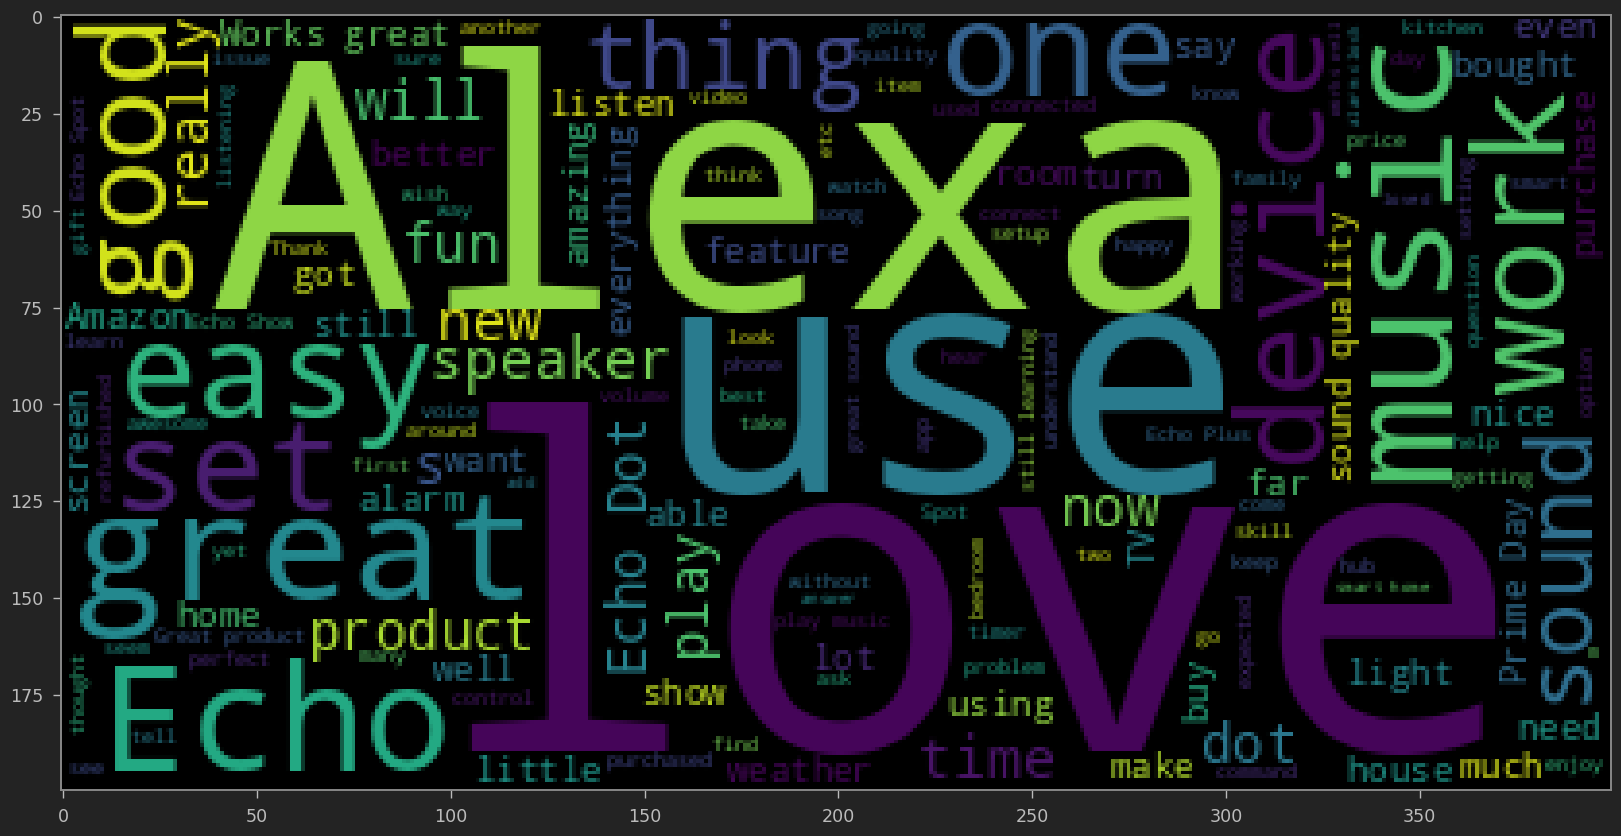

In [30]:
# For Positive reviews
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

256


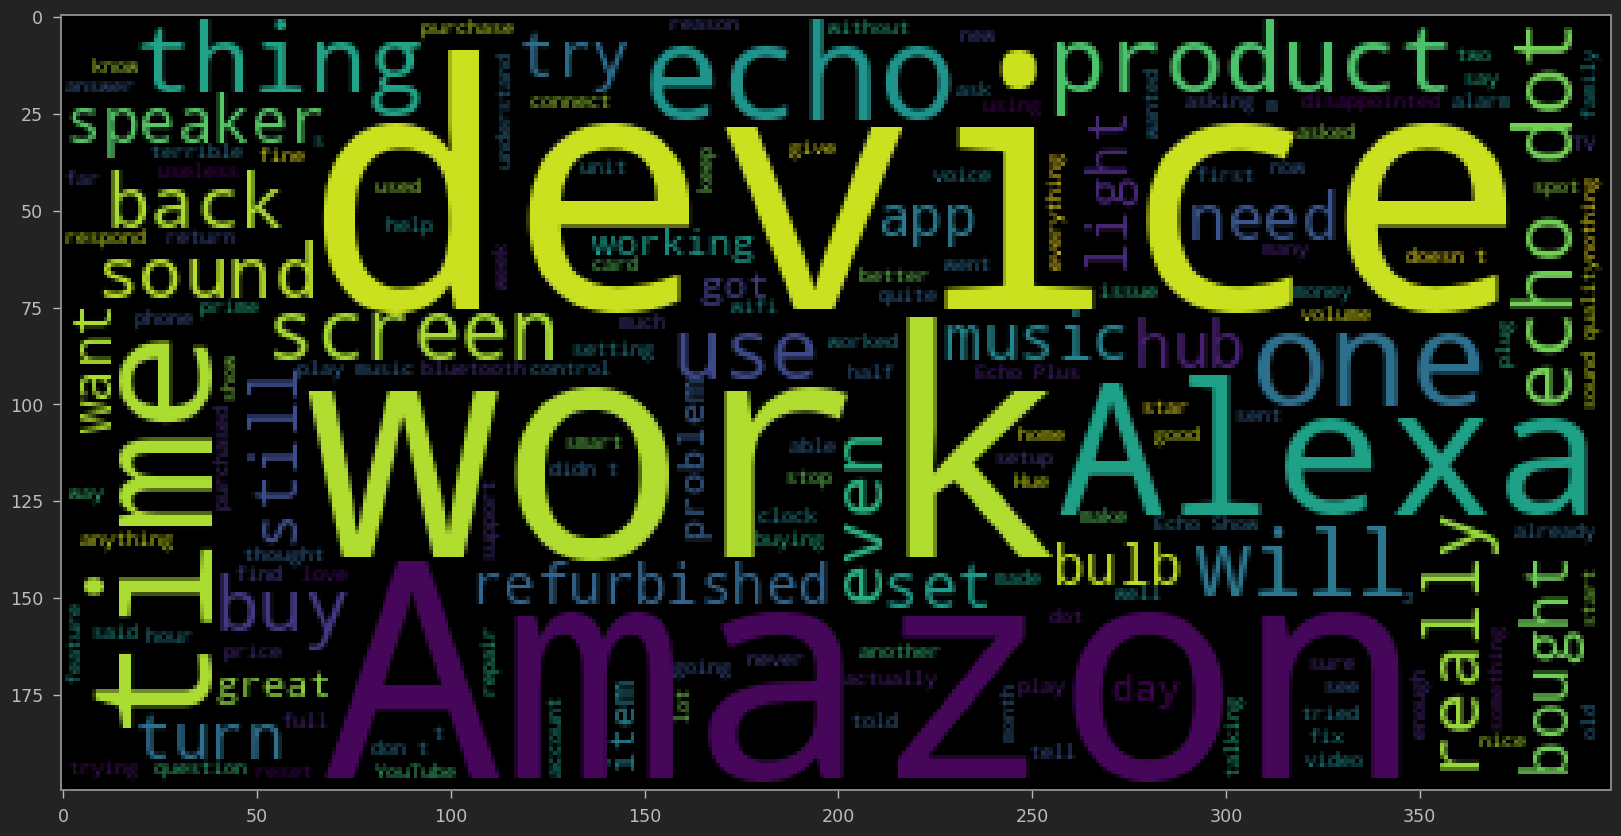

In [31]:
# For Negative reviews
sentences = negative['verified_reviews'].tolist()
print(len(sentences))

sentences_as_one_string =" ".join(sentences)

plt.figure(figsize = (20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

# TASK #4: PERFORM DATA CLEANING

In [32]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [33]:
import nltk
nltk.download('stopwords')

# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [34]:
# Let's define a pipeline to clean up all the messages
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [35]:
reviews_df_clean = reviews_df['verified_reviews'].apply(message_cleaning)

In [36]:
# show the original review
print(reviews_df['verified_reviews'][5])

I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.


In [37]:
# show the cleaned up version
print(reviews_df_clean[5])

['received', 'echo', 'gift', 'needed', 'another', 'Bluetooth', 'something', 'play', 'music', 'easily', 'accessible', 'found', 'smart', 'speaker', 'Can’t', 'wait', 'see', 'else']


In [38]:
from sklearn.feature_extraction.text import CountVectorizer

# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning)
reviews_countvectorizer = vectorizer.fit_transform(reviews_df['verified_reviews'])

In [41]:
print(vectorizer.get_feature_names_out())

['072318' '1' '10' ... '😬' '😳' '🤓']


In [42]:
print(reviews_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [43]:
reviews_countvectorizer.shape

(3149, 5211)

In [44]:
reviews = pd.DataFrame(reviews_countvectorizer.toarray())

In [45]:
X = reviews
X[:2]

,0,1,2,3,4,5,6,7,8,9,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
y = reviews_df['feedback']
y[:2]

,feedback
0,1
1,1


# TASK #5: Train and Test Naive Bayes Model

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [48]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2519, 5211), (630, 5211), (2519,), (630,))

In [49]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [50]:
from sklearn.metrics import classification_report, confusion_matrix

In [51]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
y_predict_test[:5]

array([1, 1, 1, 1, 1])

<Axes: >

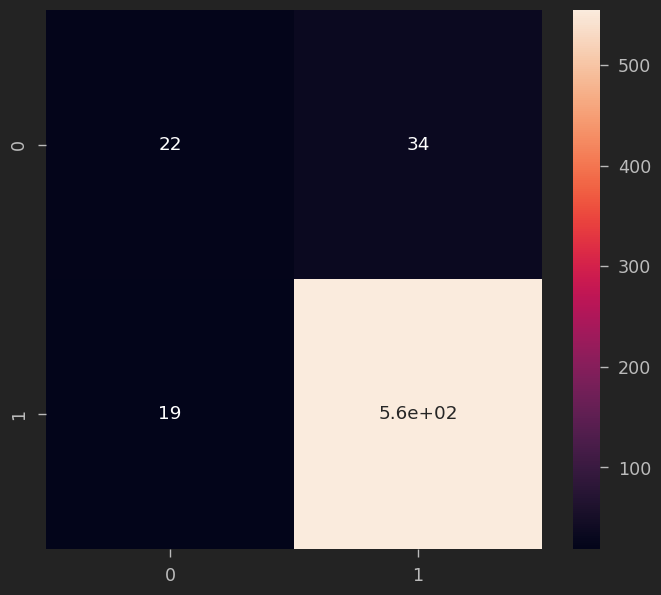

In [52]:
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [53]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.54      0.39      0.45        56
           1       0.94      0.97      0.95       574

    accuracy                           0.92       630
   macro avg       0.74      0.68      0.70       630
weighted avg       0.91      0.92      0.91       630



`Insight:` Not so good result for the class '0' as unbalanced dataset.

# TASK #6: Train and Test Logistic Regression

              precision    recall  f1-score   support

           0       0.69      0.32      0.44        56
           1       0.94      0.99      0.96       574

    accuracy                           0.93       630
   macro avg       0.81      0.65      0.70       630
weighted avg       0.92      0.93      0.91       630



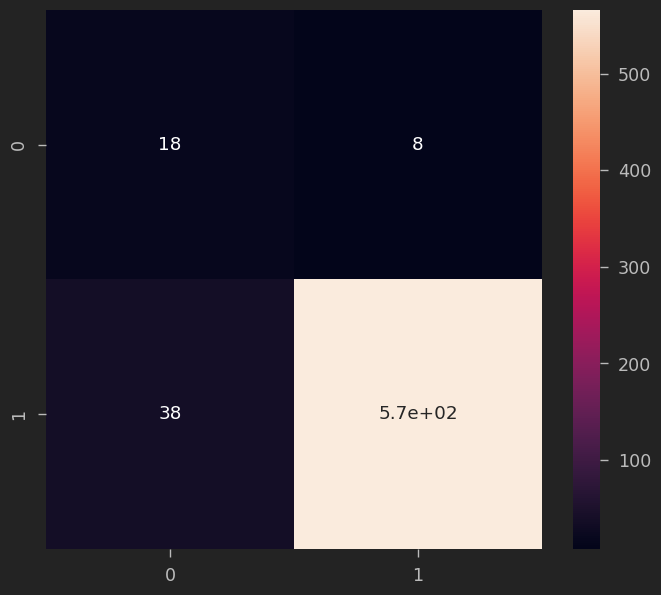

In [54]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_pred))

`Insight:` Almost similar results to Naive Bayes. Not so good result for the class '0' as unbalanced dataset.

# TASK #7: Train and Test Xgboost  Classifier

              precision    recall  f1-score   support

           0       0.73      0.20      0.31        56
           1       0.93      0.99      0.96       574

    accuracy                           0.92       630
   macro avg       0.83      0.59      0.63       630
weighted avg       0.91      0.92      0.90       630



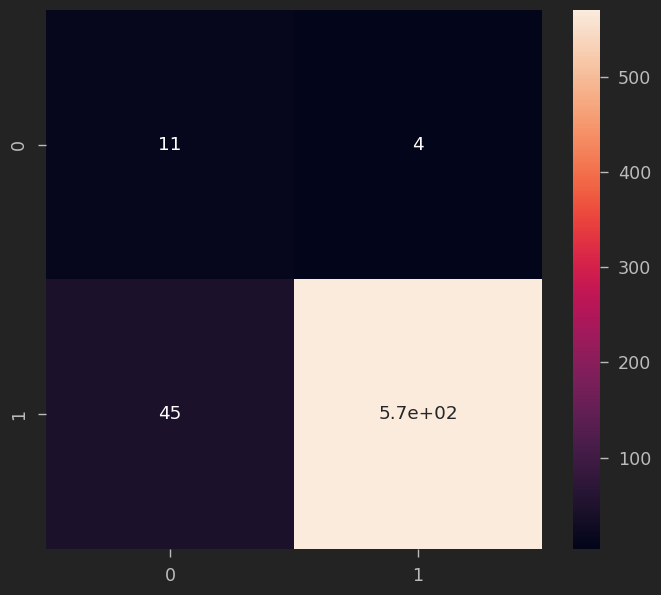

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_pred))

`Insight:` Not so good result for the class '0' as unbalanced dataset.

# TASK #8: Resampling

In [57]:
#!pip install imblearn --user

In [58]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [59]:
X_train.shape, y_train.shape

((2519, 5211), (2519,))

In [60]:
counter = Counter(y_train)
print("Before", counter)

Before Counter({1: 2319, 0: 200})


In [61]:
smt=SMOTE()
smt

SMOTE()

In [62]:
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

In [63]:
X_train_sm.shape, y_train_sm.shape

((4638, 5211), (4638,))

In [64]:
counter = Counter(y_train_sm)
print("After", counter)

After Counter({1: 2319, 0: 2319})


# TASK #9: TRAIN AND EVALUATE MODELS

              precision    recall  f1-score   support

           0       0.41      0.73      0.53        56
           1       0.97      0.90      0.93       574

    accuracy                           0.88       630
   macro avg       0.69      0.81      0.73       630
weighted avg       0.92      0.88      0.90       630



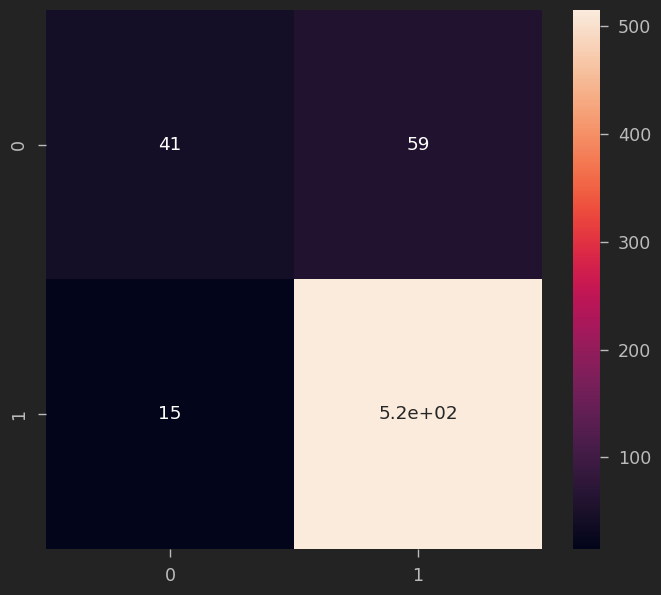

In [72]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train_sm, y_train_sm)

y_predict_test = NB_classifier.predict(X_test)

cm = confusion_matrix(y_predict_test, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.31      0.73      0.44        56
           1       0.97      0.84      0.90       574

    accuracy                           0.83       630
   macro avg       0.64      0.79      0.67       630
weighted avg       0.91      0.83      0.86       630



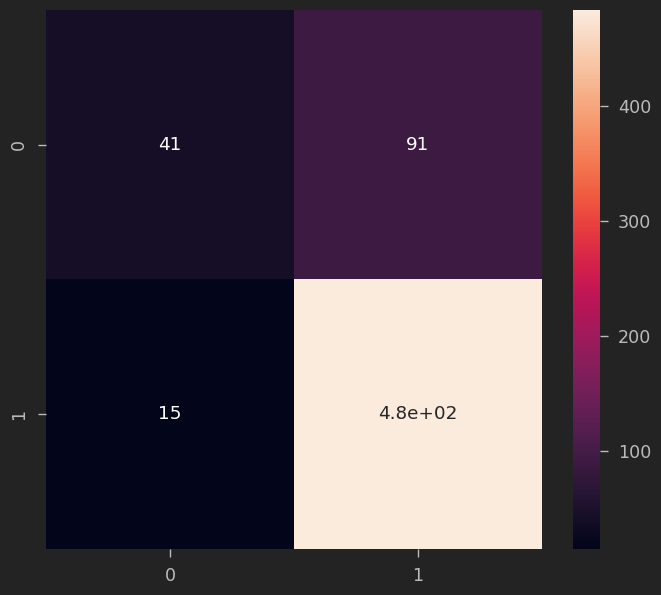

In [66]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_sm, y_train_sm)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.21      0.77      0.33        56
           1       0.97      0.72      0.82       574

    accuracy                           0.72       630
   macro avg       0.59      0.74      0.58       630
weighted avg       0.90      0.72      0.78       630



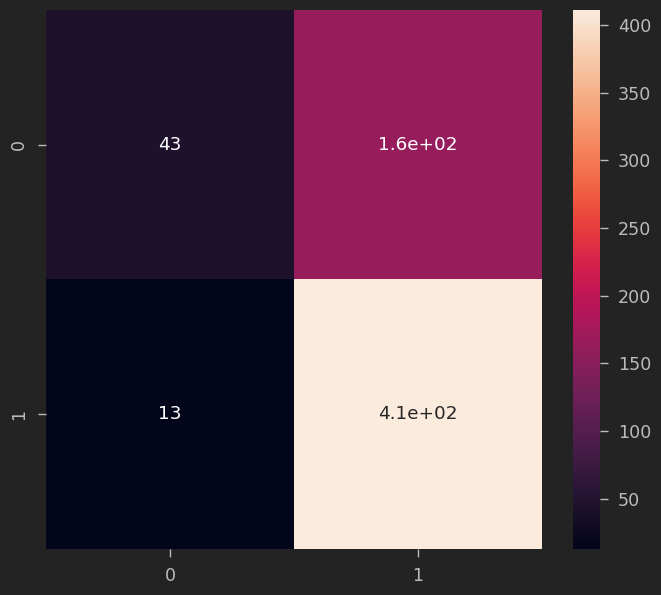

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train_sm, y_train_sm)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_pred))

`Insight:` We got slightly better results based on SMOTE oversampling but still there is scope for improvement.

# TASK #10: Resampling - RandomUnderSampler
This reduces the majority class and requires less memory as data is not increased.  

In [68]:
from imblearn.under_sampling import RandomUnderSampler

In [69]:
# Instantiate the undersampler
rus = RandomUnderSampler(random_state=42)

In [70]:
# Fit and resample the training data
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

In [71]:
print("Resampled X shape:", X_train_res.shape)
print("Resampled y distribution:", dict(zip(*np.unique(y_train_res, return_counts=True))))

Resampled X shape: (400, 5211)
Resampled y distribution: {0: 200, 1: 200}


# TASK #11: Train and Evaluate Naive Bayes Model

              precision    recall  f1-score   support

           0       0.28      0.91      0.42        56
           1       0.99      0.77      0.86       574

    accuracy                           0.78       630
   macro avg       0.63      0.84      0.64       630
weighted avg       0.93      0.78      0.83       630



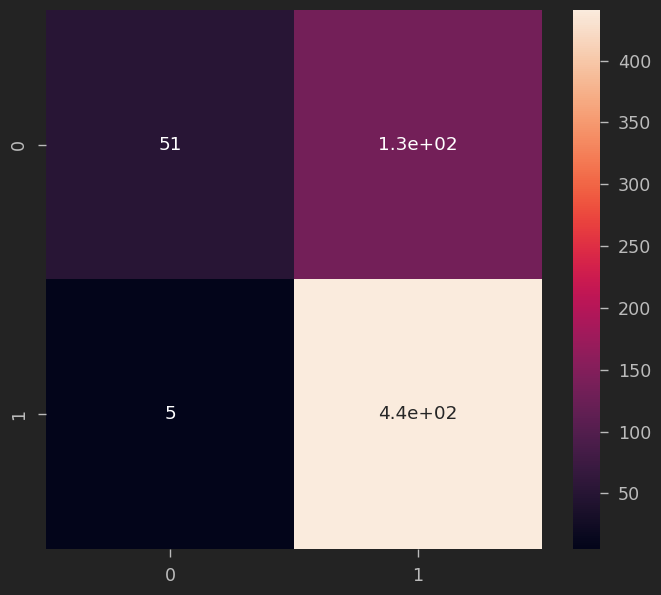

In [73]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train_res, y_train_res)

y_predict_test = NB_classifier.predict(X_test)

cm = confusion_matrix(y_predict_test, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_predict_test))

We get worse result compared to SMOTE.

We can try following:
1. Use TF-IDF Instead of Raw Counts. </br>  If you're using raw word counts, try using TF-IDF (Term Frequency-Inverse Document Frequency) to weigh terms based on their importance across the dataset. This can help Naive Bayes better identify distinguishing words for positive sentiment.
2. Remove or Reduce Noise Words. </br>  Words that appear frequently in both classes (like stopwords) can reduce the effectiveness of Naive Bayes. Use a stopword list or apply chi-square feature selection to keep only the most distinguishing word.
3. Add Bigram or Trigram Features. </br>   Consider including bigrams or trigrams instead of only unigrams to capture more context, which can improve precision for positive sentiment.
4. Try Multinomial Naive Bayes with Smoothing.</br>  Try using Multinomial Naive Bayes (for text data), with appropriate smoothing to handle zero probability.